<a href="https://colab.research.google.com/github/Muskan520/Stock-prediction-models/blob/main/LSTM_Volkswagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Predicting adjusting stock price using lstm

In [ ]:
import math
import numpy as np
import pandas_datareader as web 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get data volkswagen
df=web.DataReader('VWAGY',data_source='yahoo', start='2011-01-01',end='2021-06-07')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,15.050000,14.625000,14.625000,15.027500,188400.0,14.548043
2011-01-04,15.455000,15.165000,15.375000,15.200000,137000.0,14.715039
2011-01-05,14.875000,14.600000,14.670000,14.850000,90000.0,14.376206
2011-01-06,14.950000,14.625000,14.950000,14.675000,91000.0,14.206790
2011-01-07,15.205000,14.895000,14.895000,15.035000,140600.0,14.555304
...,...,...,...,...,...,...
2021-06-01,36.740002,36.270000,36.299000,36.669998,603900.0,36.669998
2021-06-02,37.973999,37.500000,37.736000,37.720001,628800.0,37.720001
2021-06-03,37.599998,36.360001,37.410000,37.500000,620700.0,37.500000


In [ ]:
df.shape

(2624, 6)

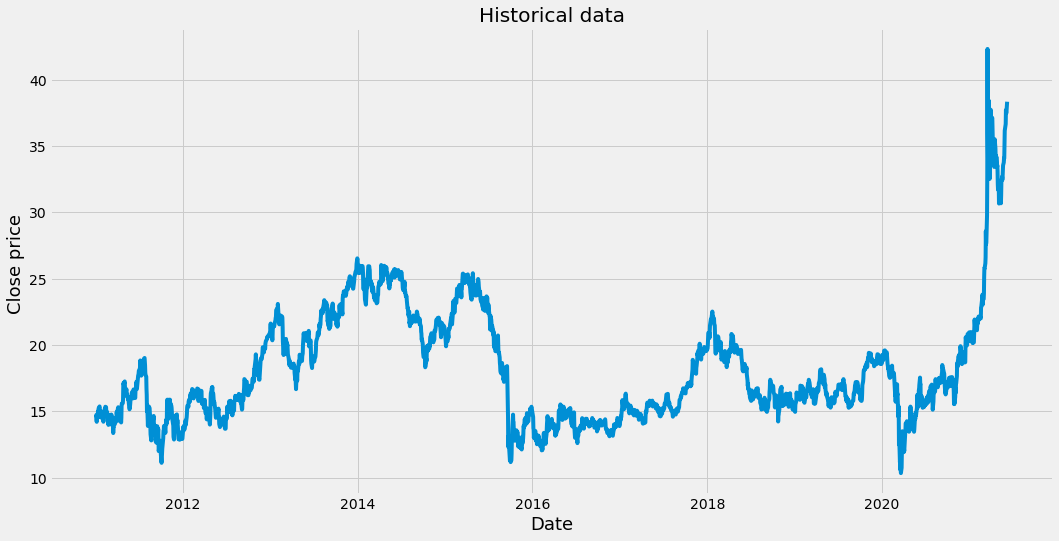

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Historical data')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price ',fontsize=18)
plt.show()


In [ ]:
data=df.filter(['Adj Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2100

In [ ]:
#scale the data
scaler= MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.13156277],
       [0.1367829 ],
       [0.12619132],
       ...,
       [0.8490188 ],
       [0.84886247],
       [0.87558893]])

In [ ]:
#creatitg training data set
#creating scaled training data set
train_data= scaled_data[0:training_data_len,:]
#split in x train and y train
x_train=[]
y_train=[]
 
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.13156277, 0.1367829 , 0.12619132, 0.12089552, 0.13178972,
       0.13057925, 0.14495358, 0.14616405, 0.1451049 , 0.15282161,
       0.15720957, 0.14919022, 0.14162477, 0.13753948, 0.13133582,
       0.13073057, 0.14525619, 0.14298656, 0.13753948, 0.13950646,
       0.14359181, 0.13451328, 0.12104684, 0.12997403, 0.13421067,
       0.14964415, 0.15176245, 0.15130855, 0.15645303, 0.15554516,
       0.14419703, 0.14525619, 0.14101955, 0.14359181, 0.13360545,
       0.12815833, 0.11363271, 0.13239497, 0.13602636, 0.1311845 ,
       0.12876358, 0.13483103, 0.12694786, 0.12498087, 0.13799338,
       0.13602636, 0.11363271, 0.12134942, 0.11983637, 0.12089552,
       0.09441652, 0.10924475, 0.10954739, 0.12894513, 0.12195467,
       0.11544841, 0.12785569, 0.12467823, 0.12104684, 0.12316515])]
[0.143743102680233]

[array([0.13156277, 0.1367829 , 0.12619132, 0.12089552, 0.13178972,
       0.13057925, 0.14495358, 0.14616405, 0.1451049 , 0.15282161,
       0.15720957, 0.14919022, 0.1416

In [ ]:
#convert x_train & y_train to numpy
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2040, 60, 1)

In [ ]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2040/2040 [==============================] - 65s 23ms/step - loss: 0.0021


In [ ]:
#Create the testing data set
#Create a new array contaiing scaled values from index 2040 to 2624
test_data=scaled_data[training_data_len-60:,:]
#create the x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]    #want our model to predict
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])   #past 60 values

In [ ]:
#convert data to numpy array
x_test=np.array(x_test)


In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#x_test

In [ ]:
#get the models preddicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.0439157084257906

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


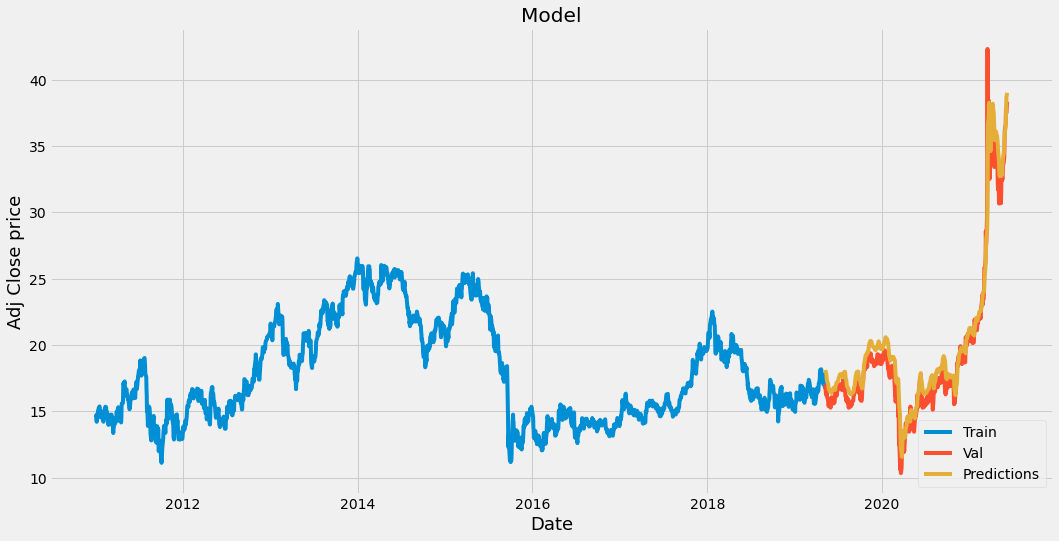

In [ ]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visu;aize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price',fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [ ]:
#Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2019-05-09,17.590000,18.119122
2019-05-10,17.170000,18.027517
2019-05-13,16.760000,17.878103
2019-05-14,16.830000,17.647787
2019-05-15,16.920000,17.454206
...,...,...
2021-06-01,36.669998,36.527626
2021-06-02,37.720001,37.238857
2021-06-03,37.500000,38.077194


In [ ]:
#Get the quote
vy_quote=web.DataReader('VWAGY',data_source='yahoo', start='2011-01-01',end='2021-06-07')
#create a new data frame
new_df=vy_quote.filter(['Adj Close'])
#Get the last 60 days closing price values and convert the data frame to array
last_60_days=new_df[-60:].values
#Scale the data
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert X_test to numpy array
X_test=np.array(X_test)
#Reshape to 3 dim
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled prixes
pred_price=model.predict(X_test)
#Undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[39.452126]]


In [ ]:
#Get the Actual data
vy_quote2=web.DataReader('VWAGY',data_source='yahoo', start='2021-06-08',end='2021-06-08')
print(vy_quote2['Adj Close'])


Date
2021-06-08    36.740002
Name: Adj Close, dtype: float64
